In [1]:
import pandas as pd
import geopandas

In [ ]:
df = pd.read_csv('data/ramen-ratings.csv')
df.loc[df['Country'] == 'United States', 'Country'] = 'United States of America'

df.head()

<AxesSubplot: >

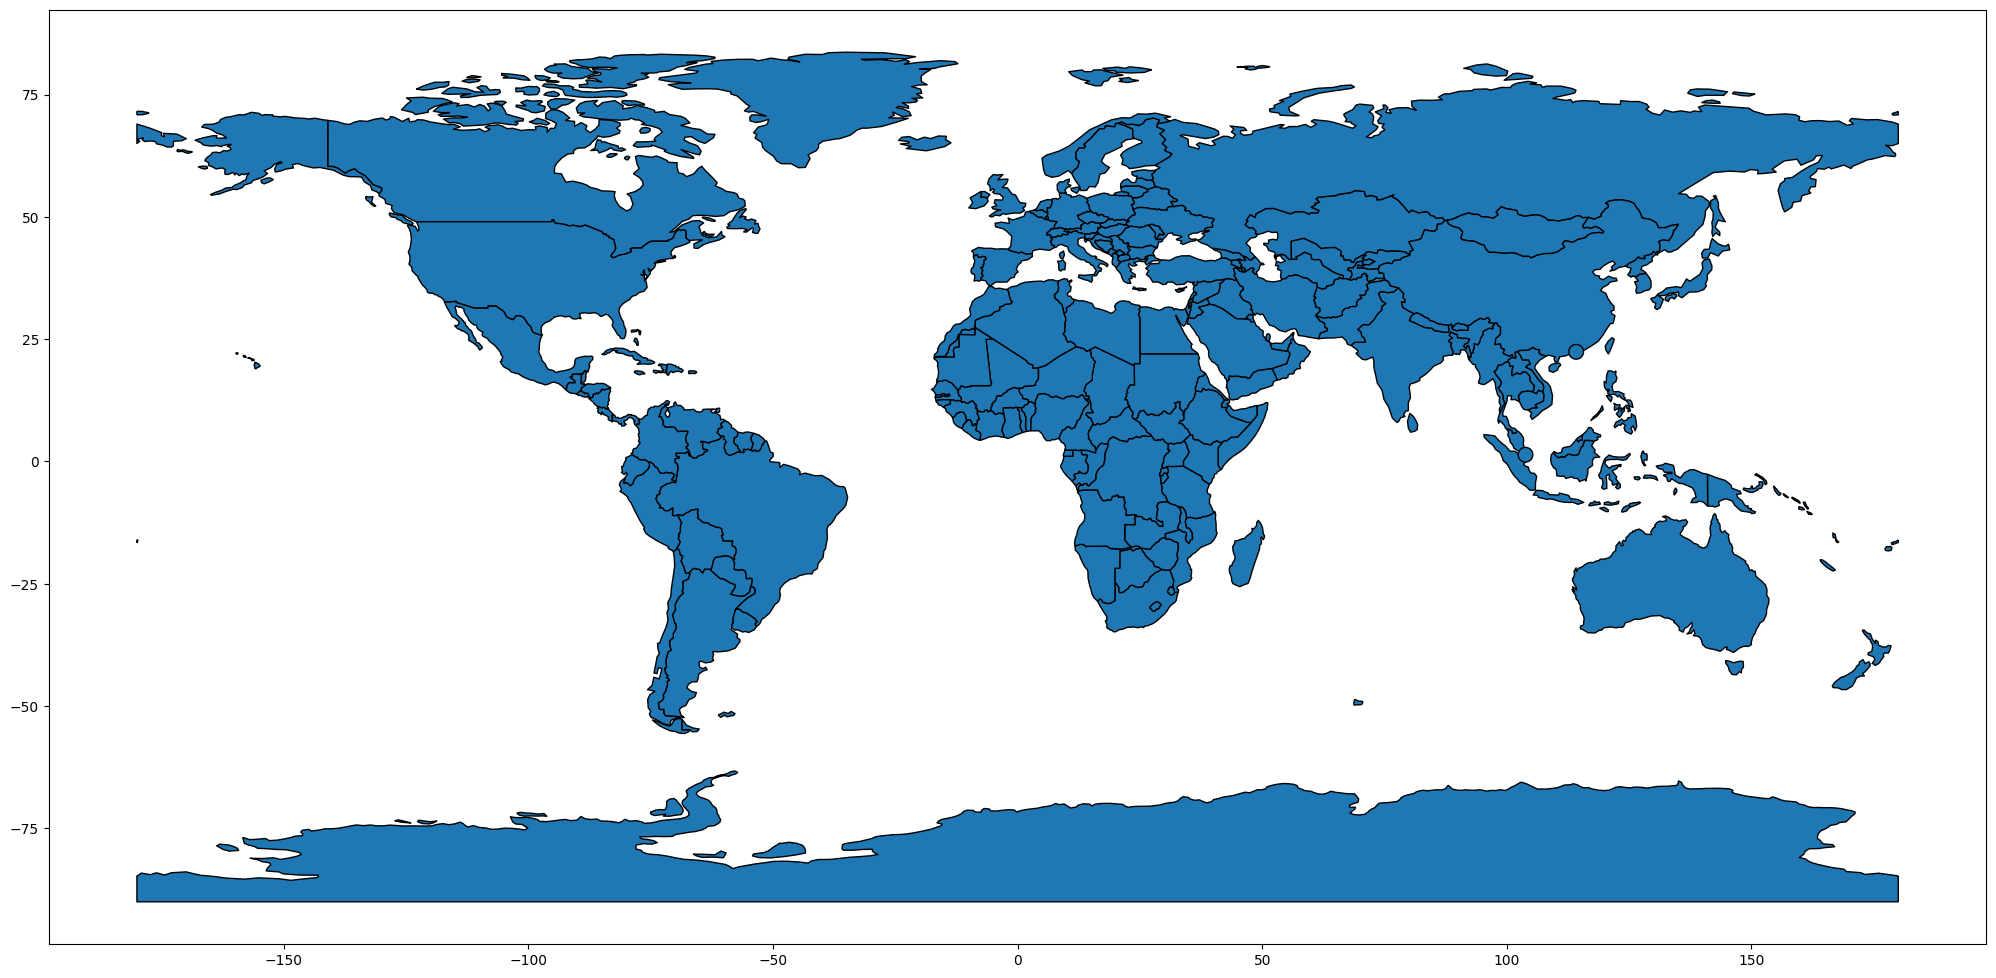

In [2]:
from shapely.geometry import Point

world: pd.DataFrame = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres'))

point = Point(103.804906, 1.373388).buffer(1.5)
world = pd.concat([world, pd.DataFrame({"name": ["Singapore"], "geometry": [point]})])

point = Point(114.165247, 22.409866).buffer(1.5)
world = pd.concat([world, pd.DataFrame({"name": ["Hong Kong"], "geometry": [point]})])

world.plot(edgecolor='black', figsize=(25, 25))

In [ ]:
merged = df.merge(world,left_on="Country", right_on="name", how="left")

by_variety = merged.groupby(by=['Country', 'Style']).count().copy()['Brand'].unstack(1)
# .merge(world, left_on='Country', right_on='name')

by_variety['Max'] = by_variety.idxmax(axis=1)
by_variety = by_variety['Max'].to_frame().reset_index()
world_with_color = world.merge(by_variety, left_on='name', right_on='Country', how='left')
"""
supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu',
'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r',
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r',
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray',
'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet',
'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r',
'winter', 'winter_r'
"""

# Plot by most common variety

world_with_color
world_with_color.plot(
    column='Max',
    cmap='plasma_r',
    legend=True,
    figsize=(25,25),
    edgecolor='white',
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
).set_axis_off()

In [ ]:
pd.set_option('display.max_rows', 500)
geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))['name']

In [ ]:
# [print(d) for d in df.unique(subset='Brand')['Brand'].sort().to_list()];

df.filter(
    pl.col('Brand').str.contains('Samyang')
)

# df.filter(
#     pl.col('Top Ten').is_not_null()
# ).sort(by='Top Ten')

# df['Style'].unique()

df.filter(
    pl.col('Country').sort(by='Country'))